**Level 2 – Task 1: Regression Analysis**

In [30]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


Load the Cleaned Dataset

In [31]:
df = pd.read_csv("cleaned_house_data.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


verification

In [32]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Define Features (X) and Target (y)

In [38]:
df = pd.read_csv("cleaned_house_data.csv")

# Assuming 'MEDV' is the target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (506, 13)
Target (y) shape: (506,)


Train–Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


Train Linear Regression Model

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make Predictions

In [41]:
y_pred = model.predict(X_test)

print("Predictions made successfully.")

Predictions made successfully.


Model Evaluation

In [42]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared (R2 Score): {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R-squared (R2 Score): 0.67
Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93


Interpret Model Coefficients

In [43]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff_df


,Feature,Coefficient
5,RM,4.438835
3,CHAS,2.784438
8,RAD,0.262430
2,INDUS,0.040381
1,ZN,0.030110
11,B,0.012351
6,AGE,-0.006296
9,TAX,-0.010647
0,CRIM,-0.113056
12,LSTAT,-0.508571


Actual vs Predicted Visualization

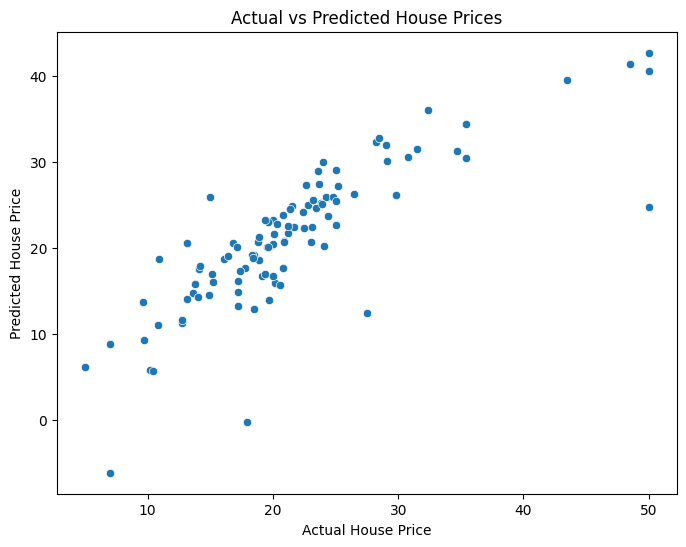

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


### Model Evaluation
The linear regression model was evaluated using R-squared and Mean Squared Error.
The R-squared value indicates how well the independent variables explain variations in house prices.

### Model Interpretation
Features such as RM and LSTAT have significant influence on house prices.
Positive coefficients indicate a direct relationship with price, while negative coefficients indicate an inverse relationship.

### Conclusion
The regression model demonstrates reasonable predictive performance and provides insights into key factors affecting house prices.
